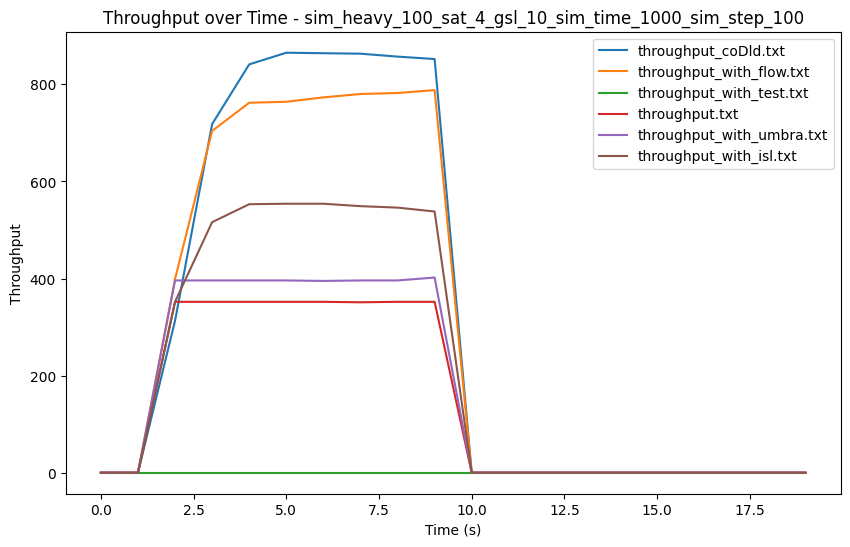

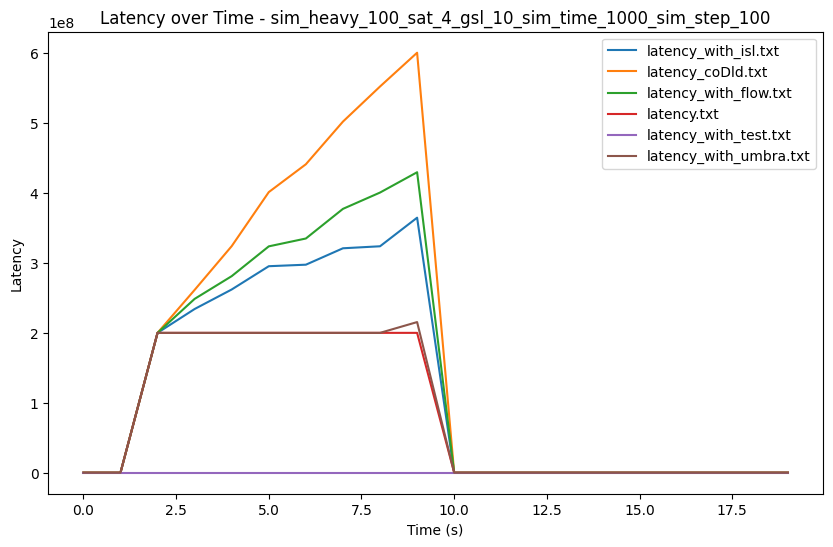

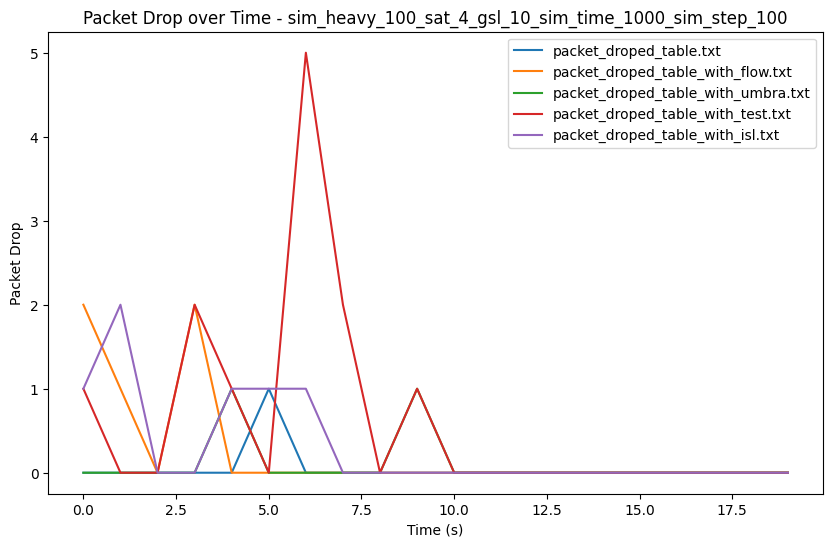

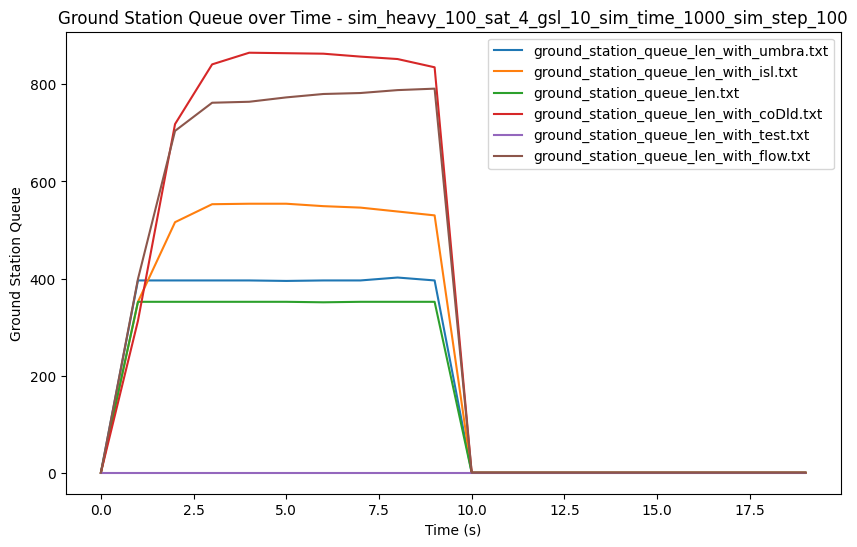

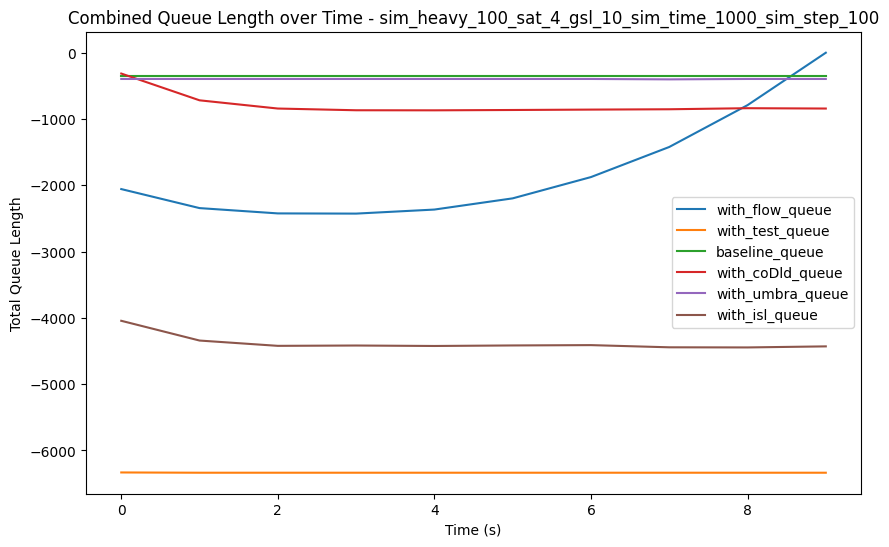

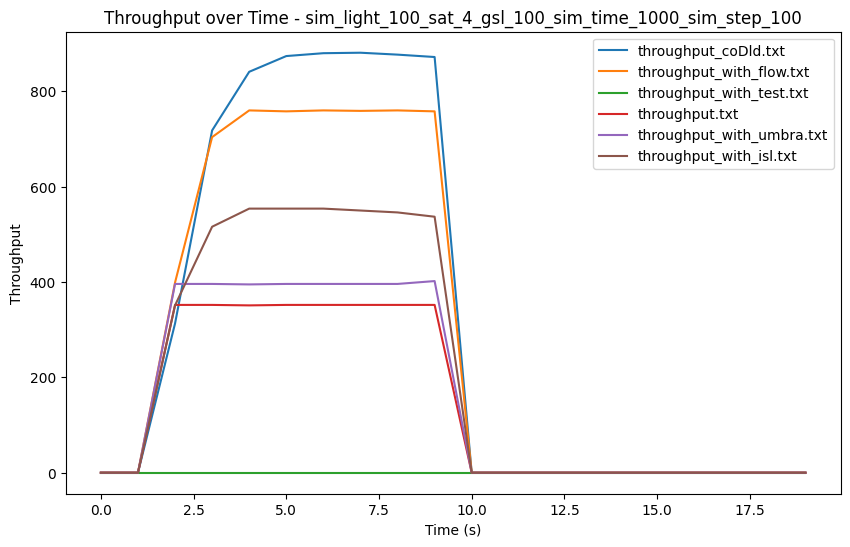

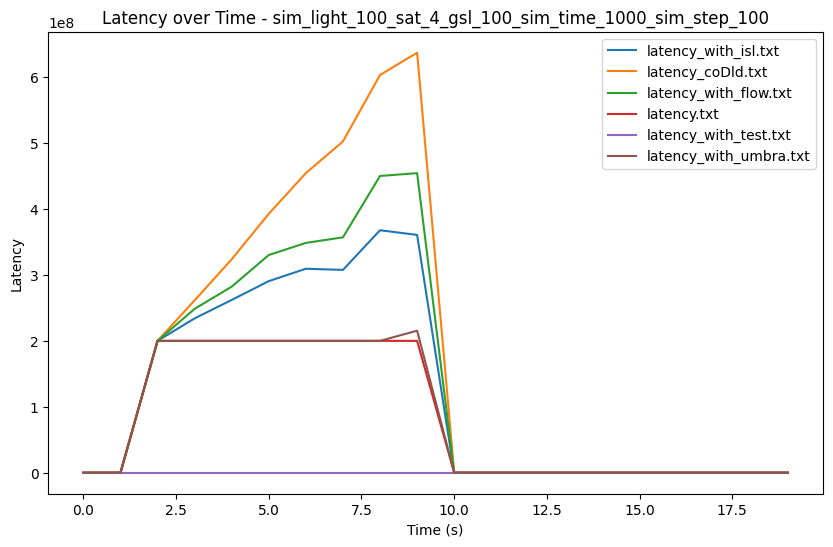

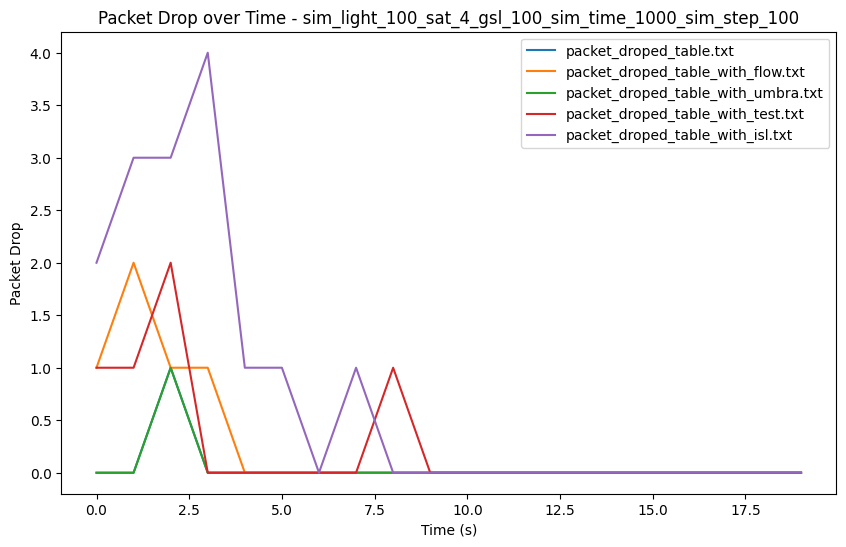

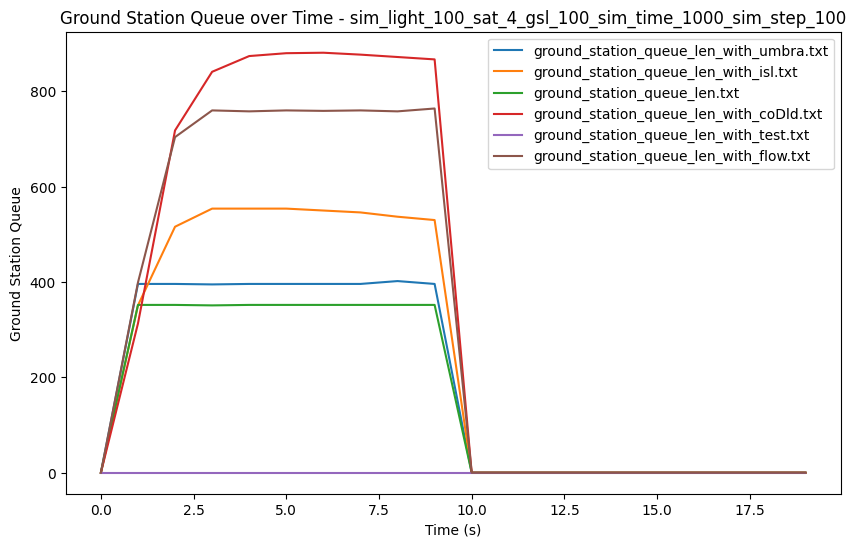

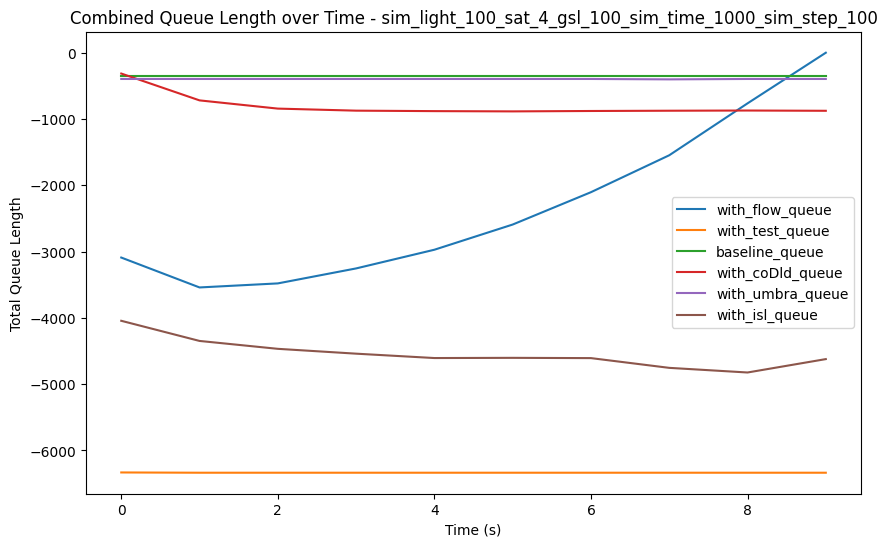

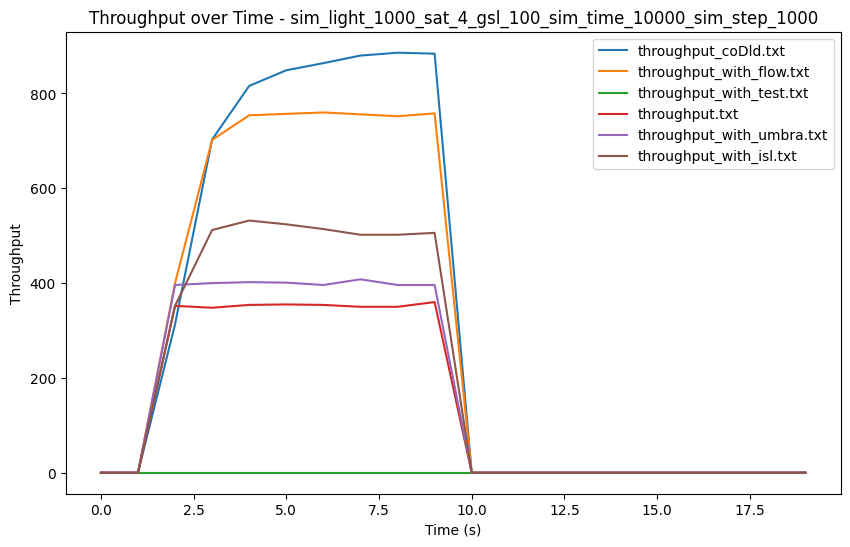

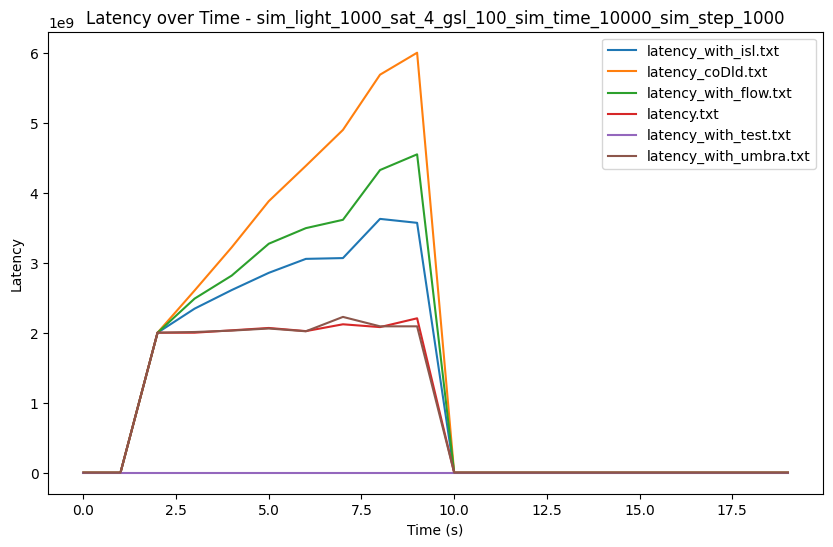

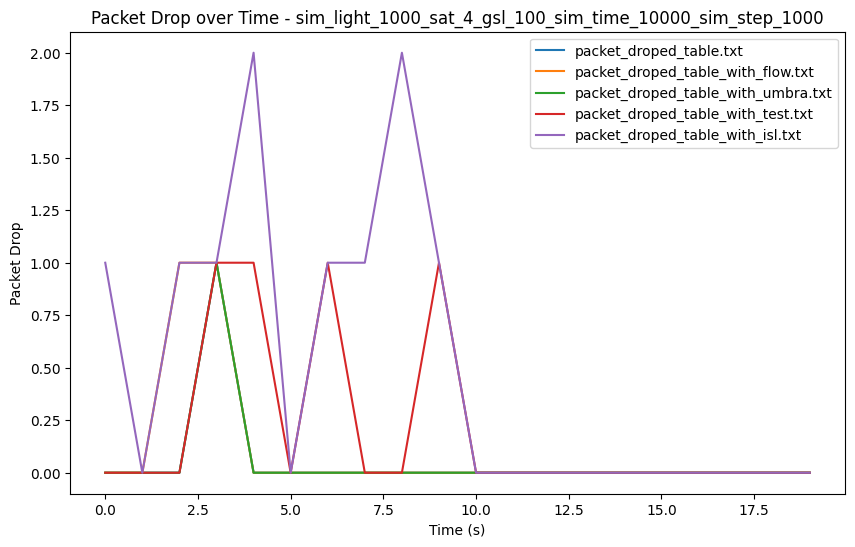

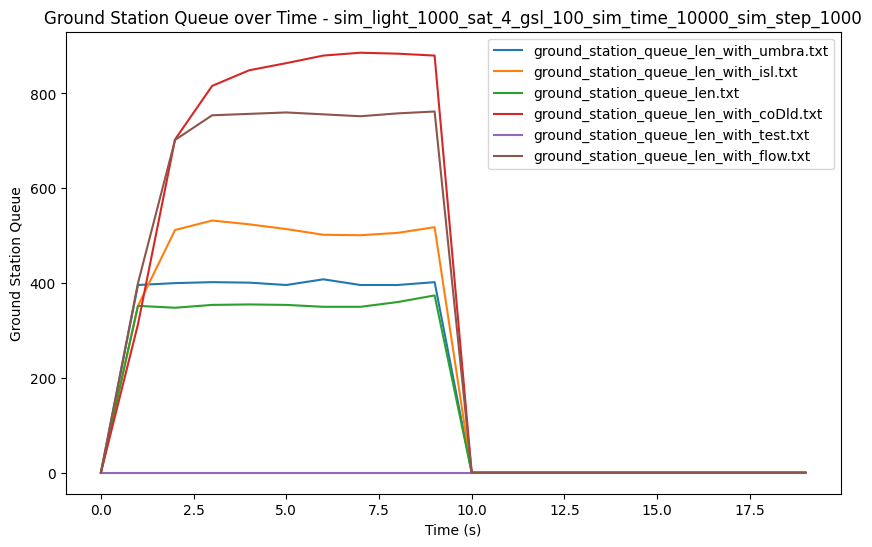

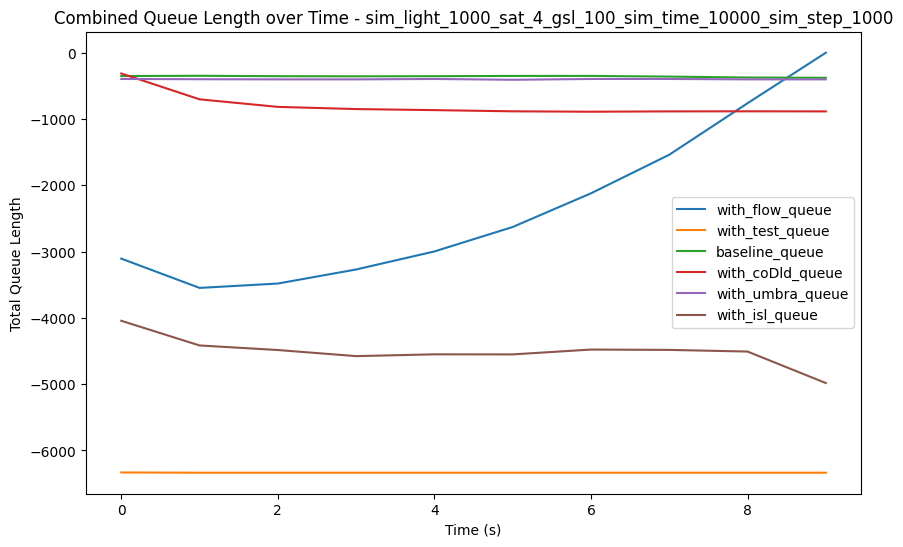

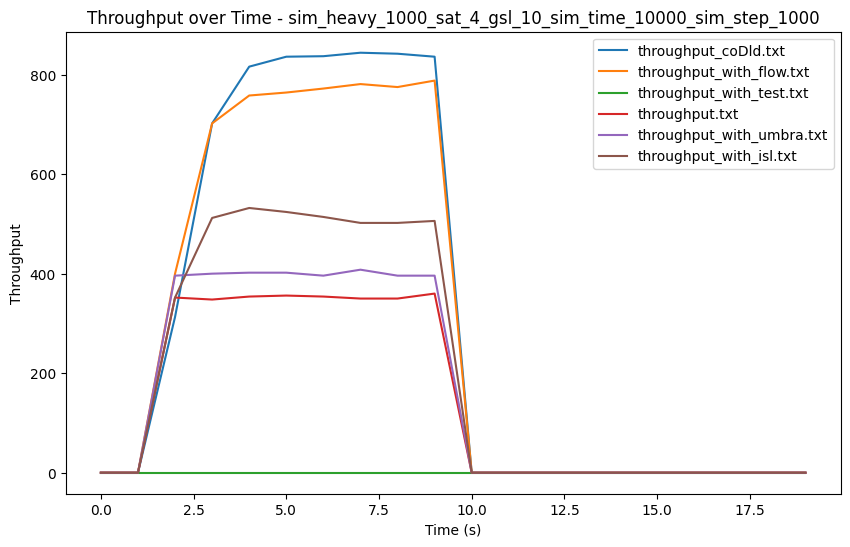

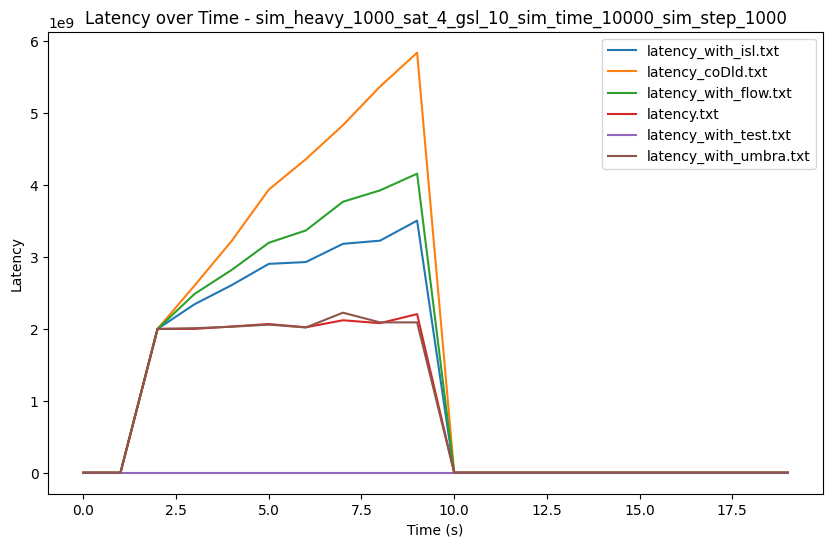

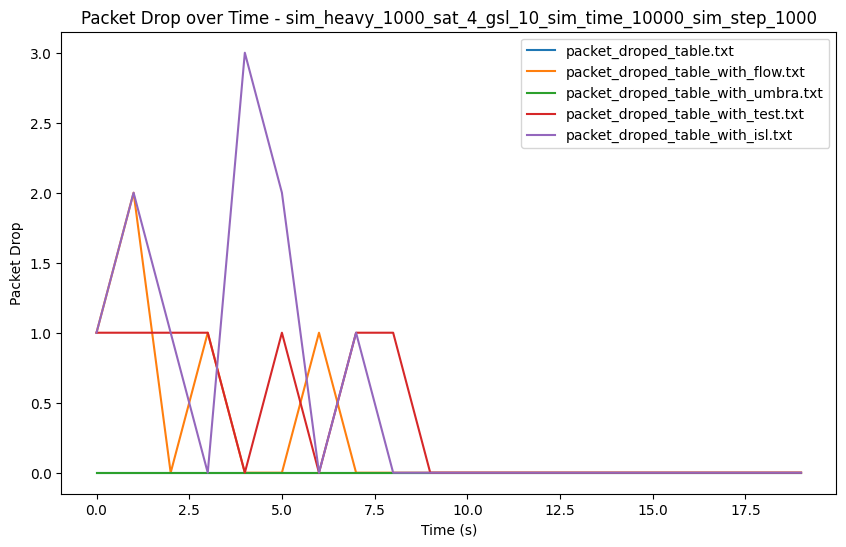

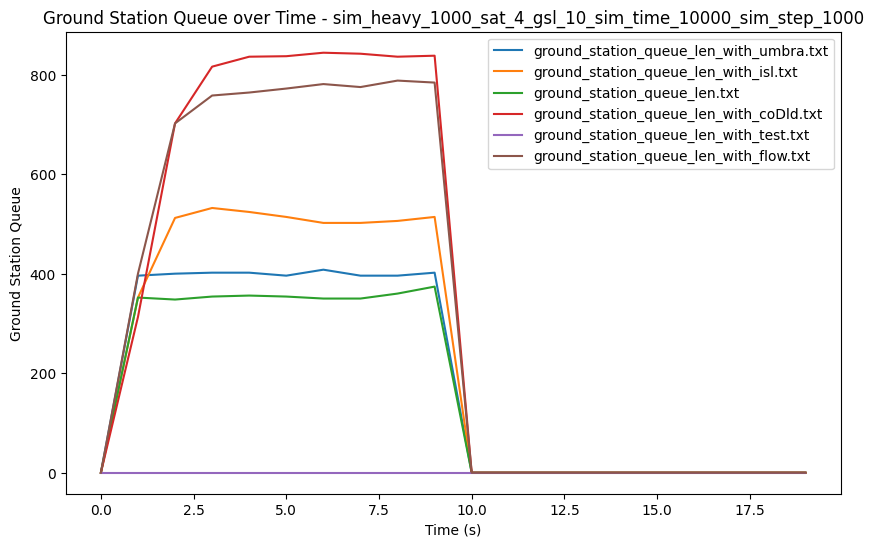

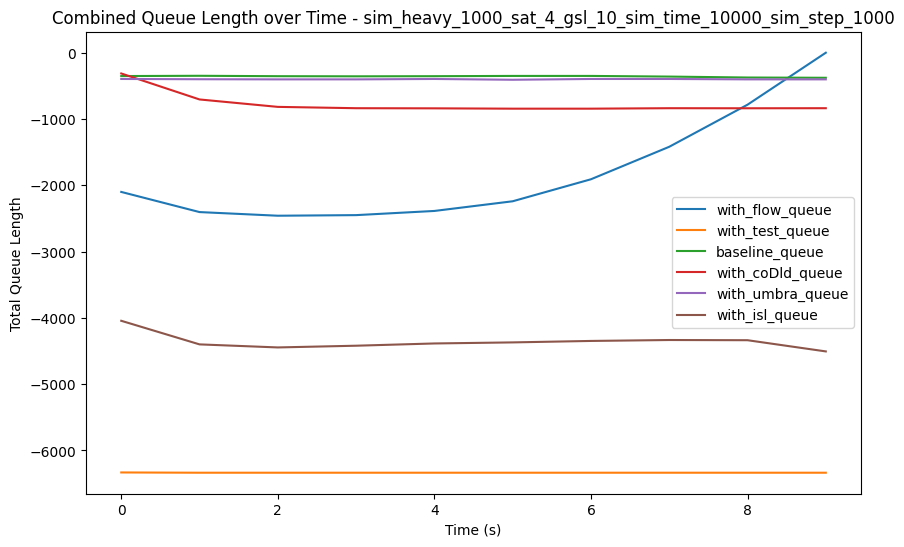

In [1]:
import os
import matplotlib.pyplot as plt

def read_data(file_path):
    """Read data from a text file and return it as a list."""
    with open(file_path, 'r') as file:
        return [float(line.strip()) for line in file]

def process_folder(folder_path, file_keyword):
    """Process all files in a folder that contain a specific keyword."""
    data = {}
    for file in os.listdir(folder_path):
        if file_keyword in file:
            file_path = os.path.join(folder_path, file)
            data[file] = read_data(file_path)
    return data

def sum_queue_lengths(folder_path):
    """Sum the queue lengths of all files in a queue folder."""
    total_queue_length = []
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        queue_length = read_data(file_path)
        if not total_queue_length:
            total_queue_length = queue_length
        else:
            total_queue_length = [sum(x) for x in zip(total_queue_length, queue_length)]
    return total_queue_length

def plot_data_single_experiment(data, experiment, data_type):
    """Plot data for a single experiment."""
    plt.figure(figsize=(10, 6))
    for key, values in data.items():
        plt.plot(values, label=key)
    plt.title(f'{data_type} over Time - {experiment}')
    plt.xlabel('Time (s)')
    plt.ylabel(data_type)
    plt.legend()
    plt.show()

def plot_combined_queue_length(experiment_path, experiment_name):
    """Plot the combined queue length of all algorithms in a single experiment."""
    combined_data = {}

    for folder in os.listdir(experiment_path):
        if 'queue' in folder and os.path.isdir(os.path.join(experiment_path, folder)):
            queue_folder_path = os.path.join(experiment_path, folder)
            queue_len_data = sum_queue_lengths(queue_folder_path)
            combined_data[folder] = queue_len_data

    # Plot the combined queue length data
    plt.figure(figsize=(10, 6))
    for key, values in combined_data.items():
        plt.plot(values, label=key)
    plt.title(f'Combined Queue Length over Time - {experiment_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Total Queue Length')
    plt.legend()
    plt.show()



# Path to the gen_data directory
gen_data_path = 'gen_data'  # 修改为实际路径

# Processing and plotting data for each experiment separately
for experiment in os.listdir(gen_data_path):
    folder_path = os.path.join(gen_data_path, experiment)

    # Process and plot throughput data
    throughput_data = process_folder(folder_path, 'throughput')
    if throughput_data:
        plot_data_single_experiment(throughput_data, experiment, 'Throughput')

    # Process and plot latency data
    latency_data = process_folder(folder_path, 'latency')
    if latency_data:
        plot_data_single_experiment(latency_data, experiment, 'Latency')

    # Process and plot packet dropped data
    packet_drop_data = process_folder(folder_path, 'packet_droped_table')
    if packet_drop_data:
        plot_data_single_experiment(packet_drop_data, experiment, 'Packet Drop')
    
    
    groud_station_data = process_folder(folder_path, 'ground_station')
    if groud_station_data:
        plot_data_single_experiment(groud_station_data, experiment, 'Ground Station Queue')
    
    folder_path = os.path.join(gen_data_path, experiment)

    # Other processing and plotting (Throughput, Latency, Packet Drop)...

    # Process and plot combined queue length data
    plot_combined_queue_length(folder_path, experiment)
    # Process and plot queue length data for each queue folder
